# E-Commerce Data
This dataset consists of orders made in different countries from December 2010 to December 2011. The company is a UK-based online retailer that mainly sells unique all-occasion gifts. Many of its customers are wholesalers. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [ ]:
# Load packages
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

pd.read_csv("online_retail.csv")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


## Data Dictionary
| Variable    | Explanation                                                                                                                       |
|-------------|-----------------------------------------------------------------------------------------------------------------------------------|
| InvoiceNo   | A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c' it indicates a cancellation. |
| StockCode   | A 5-digit integral number uniquely assigned to each distinct product.                                                             |
| Description | Product (item) name                                                                                                               |
| Quantity    | The quantities of each product (item) per transaction                                                                             |
| InvoiceDate | The day and time when each transaction was generated                                                                              |
| UnitPrice   | Product price per unit in sterling (pound)                                                                                        |
| CustomerID  | A 5-digit integral number uniquely assigned to each customer                                                                      |
| Country     | The name of the country where each customer resides                                                                               |

[Source](https://archive.ics.uci.edu/ml/datasets/online+retail#)  of dataset.

**Citation:** Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: What five countries are responsible for the most profit (by quantity and price of goods sold)?
- 📊 **Visualize**: Create a plot visualizing the profits earned from UK customers weekly, monthly, and quarterly.
- 🔎 **Analyze**: Are order sizes from countries outside the United Kingdom significantly larger than orders from inside the United Kingdom?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You are working for an online retailer. Currently, the retailer sells over 4000 unique products. To take inventory of the items, your manager has asked you whether you can group the products into a small number of categories. The categories should be similar in terms of price and quantity sold and any other characteristics you can extract from the data.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

---

✍️ _If you have an idea for an interesting Scenario or Challenge, or have feedback on our existing ones, let us know! You can submit feedback by pressing the question mark in the top right corner of the screen and selecting "Give Feedback". Include the phrase "Content Feedback" to help us flag it in our system._

# Data Understanding

## Import Data

In [ ]:
df = pd.read_csv("online_retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


## Data Information

In [ ]:
print("Dataset Info: ")
df.info()

print("\n\nDataset Columns: ", df.columns)

print("\n\nDataset Summary: ")
print(df.describe())

print('\n\nAny Missing Column: ')
df.isnull().any()

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Dataset Columns:  Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


Dataset Summary: 
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.60

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [ ]:
print("Countries in the dataset:\n ", df.Country.unique())

print("\n")

neg_price = df[df.UnitPrice < 0]
print("Rows with negative price: ", len(neg_price))

neg_quantity = df[df.Quantity < 0]
print ("Rows with negative quantity: ", len(neg_quantity))

print ("Total missing ID: ", df.CustomerID.isnull().sum())

print ("Total missing Description: ", df.Description.isnull().sum())

Countries in the dataset:
  ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


Rows with negative price:  2
Rows with negative quantity:  10624
Total missing ID:  135080
Total missing Description:  1454


# Data Cleansing

## Replace/Rename Data

In [ ]:
df.rename({'UnitPrice':'price'}, axis = 1, inplace = True)

df['Country'] = df['Country'].replace({'EIRE':'Ireland', 'RSA':'South Africa', 'European Community':'Other EU'})

print(df.columns)

print(df.Country.unique())

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'price', 'CustomerID', 'Country'],
      dtype='object')
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'Ireland' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA' 'Other EU' 'Malta'
 'South Africa']


## Handle Missing Values

Visualize the missing values distribution

<AxesSubplot:>

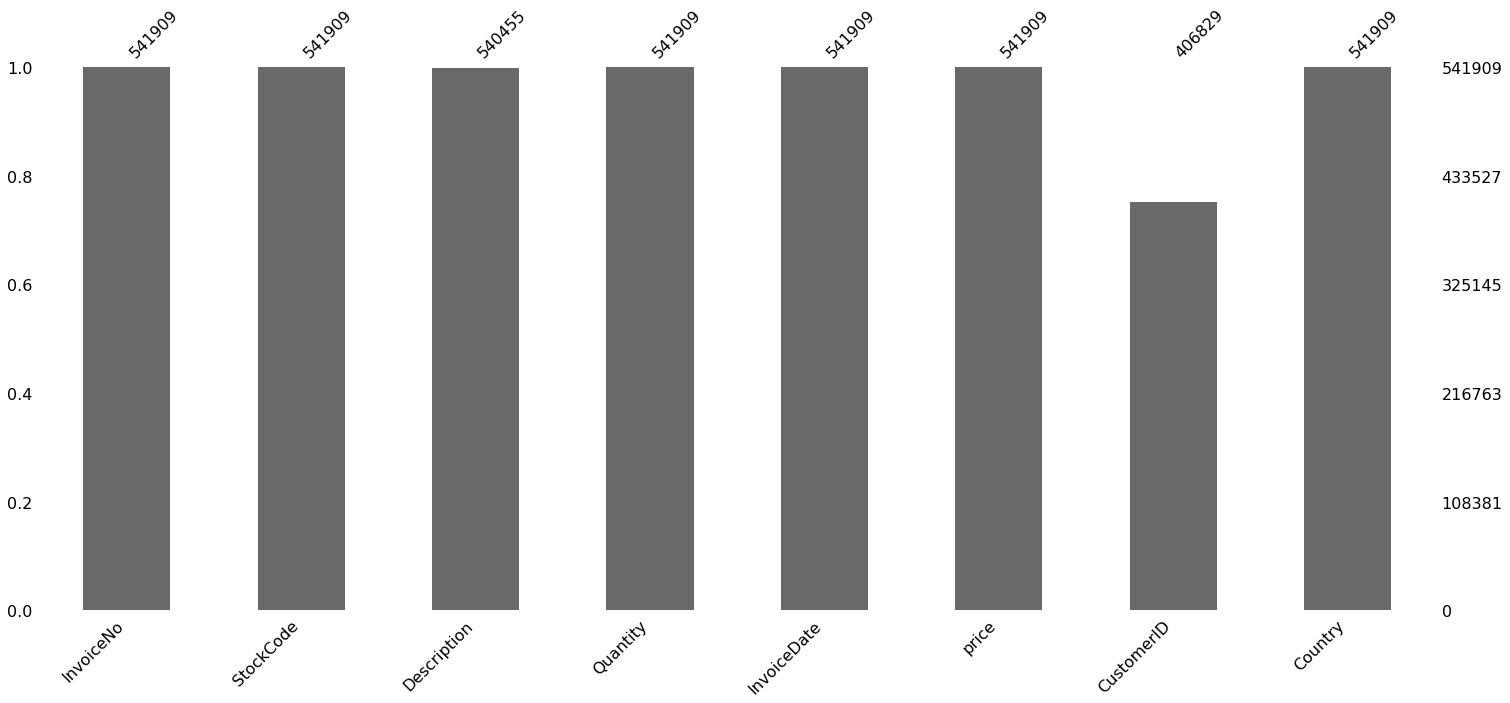

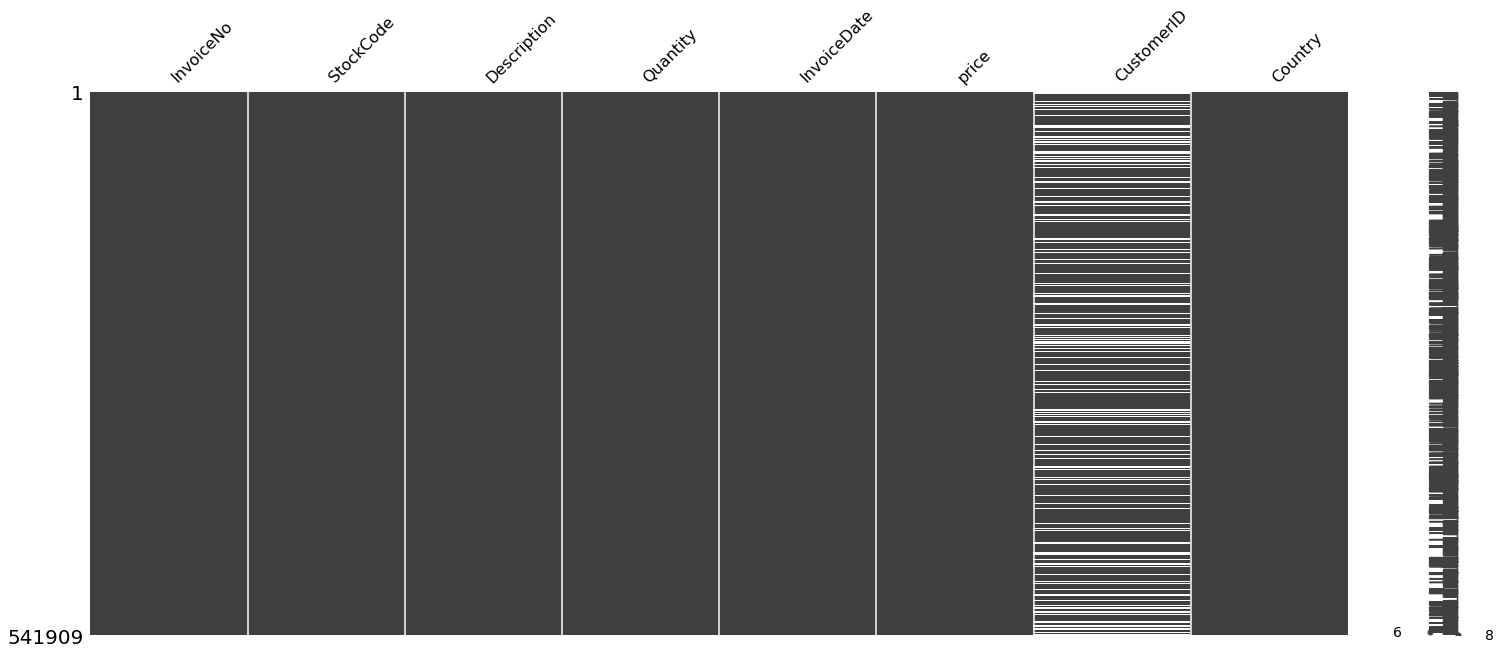

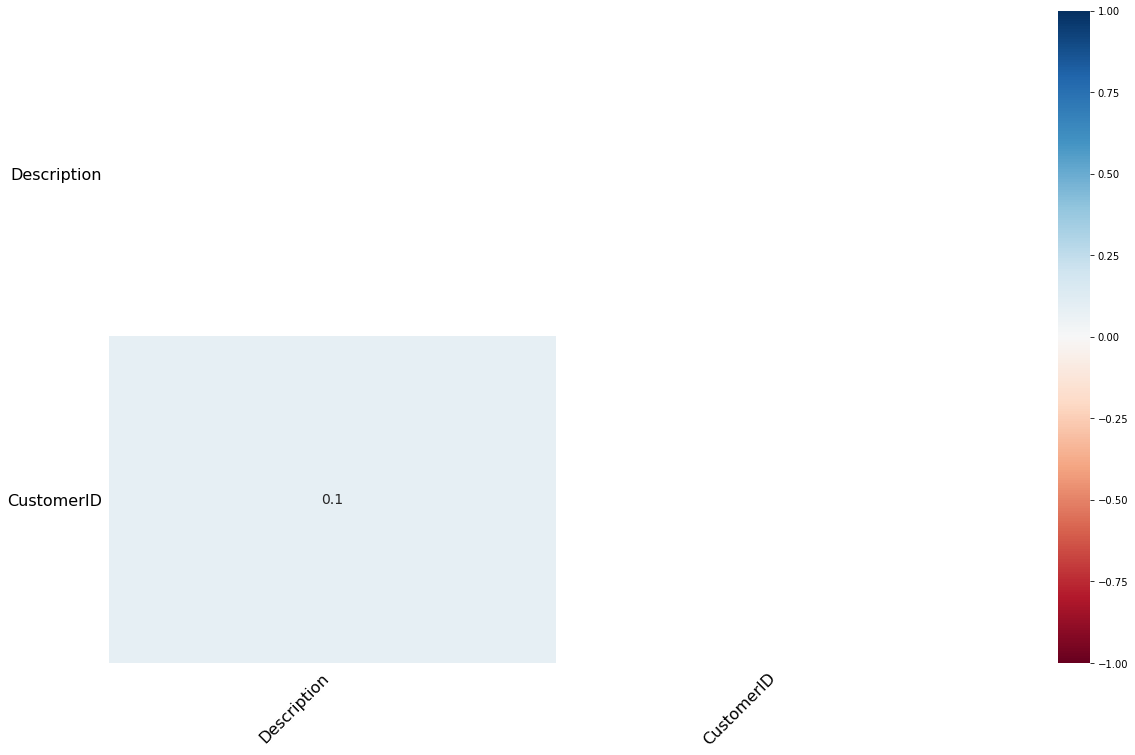

In [ ]:
import missingno as msno
msno.bar(df)
msno.matrix(df)
msno.heatmap(df)
# msno.dendrogram(df)

### Drop Missing Values

In [ ]:
# Drop the ID column
df = df.drop('CustomerID', axis = 1)
df.columns

# Drop Missing Description
df.dropna(subset = ['Description'], how = 'any', inplace = True)

print(df.isnull().any())
print(df.isnull().sum())

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
price          False
Country        False
dtype: bool
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
price          0
Country        0
dtype: int64


### Price Missing Values

Even though there were no missing values for the 'price' column, we notice that there are actually prices with value 0. This kind of value can be identified as missing value since it's illogical to sell an item for free. We can replace those 0s with NaN.

In [ ]:
print("Total of 0 prices:", len(df[df.price == 0]))

df.price[df.price == 0] = np.nan

df.isnull().any()

Total of 0 prices: 1061


InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
price           True
Country        False
dtype: bool

### Fill Missing Values

We can fill the missing values in the 'price' column with bfill or ffill or others. In this case, we will fill them with the current mean of the 'price' column. 

In [ ]:
price_mean = df.price.mean()
df.fillna({'price' : price_mean}, inplace = True)
df.isnull().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
price          False
Country        False
dtype: bool

## Invalid Entries

Based on the dataset summary seen, the minimum value for the 'Quantity' and 'Price' column are negative which are peculiar. We can convert those negative values to be postive with the abs() function. It seems that most negative quantity values have a relation with the cancellation Invoice Number.

In [ ]:
# Number of Rows with negative Quantity
df_neg = df[df.Quantity < 0]
print("Number of Rows with negative Quantity: " + str(len(df_neg)))

# Number of Rows with InvoiceNo which contains 'C' (cancellation)
df_c = df[df.InvoiceNo.str.contains('C')]
print("Number of Rows with cancellation: " + str(len(df_c)))
df_c.head()

# Number of Rows with negative Quantity with InvoiceNo is not cancellation
df_neg_c = df[(df.Quantity < 0) & (df.InvoiceNo.str.contains('C') == False)]
print("Number of Rows with negative Quantity w/o cancellation: " + str(len(df_neg_c)))
df_neg_c.head(10)

# Filter cancellation rows
df = df[df.InvoiceNo.str.contains('C') == False]
print('\nTotal data rows without cancellation: ' + str(len(df)))
print('The rest negative quantity total rows: ' + str(len(df[df.Quantity < 0])))

# Convert negative values to positive
df.Quantity = abs(df.Quantity)
df.price = abs(df.price)

print("\nTotal negative prices: ", len(df[df.price < 0]))
print("Total negative quantity: ", len(df[df.Quantity < 0]))

Number of Rows with negative Quantity: 9762
Number of Rows with cancellation: 9288
Number of Rows with negative Quantity w/o cancellation: 474

Total data rows without cancellation: 531167
The rest negative quantity total rows: 474

Total negative prices:  0
Total negative quantity:  0


So there are about 9288 rows which contains both cancellation invoice number and negative quantity values. So we will just drop/filter those rows and it leaves us with 474 rows that contains negative quantities. Then we can just convert both negative price and the remaining negative quantity to positive values.

## Manipulate Columns

Add profit column, it's basically total cost spent in each transaction. Also convert the data type for 'InvoiceDate' column from object to date.

In [ ]:
df['profit'] = df.Quantity * df.price
df.head(5)

df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

# EDA

### 🗺️ **Explore**: What five countries are responsible for the most profit (by quantity and price of goods sold)?

In [ ]:
import seaborn as sns

df_profit_country = df.groupby('Country')['profit'].sum()
print(df_profit_country.sort_values(ascending = False))
sns.catplot(x = 'Country', y = 'profit', kind = 'bar', data = df, estimator = sum)
plt.show()

Country
United Kingdom          9.972391e+06
Netherlands             2.881147e+05
Ireland                 2.847233e+05
Germany                 2.288764e+05
France                  2.097197e+05
Australia               1.399482e+05
Spain                   6.162807e+04
Switzerland             5.709453e+04
Belgium                 4.119634e+04
Sweden                  3.837833e+04
Japan                   3.741637e+04
Norway                  3.617471e+04
Portugal                3.374710e+04
Finland                 2.254608e+04
Singapore               2.127929e+04
Channel Islands         2.045044e+04
Denmark                 1.895534e+04
Italy                   1.748324e+04
Hong Kong               1.569180e+04
Cyprus                  1.359038e+04
Austria                 1.019868e+04
Israel                  8.135260e+03
Poland                  7.334650e+03
Greece                  4.760520e+03
Unspecified             4.749790e+03
Iceland                 4.310000e+03
Canada                  3.6663

Based on the grouped dataframe above, we can see the five countries who produce the most profit are:
1. United Kingdom
2. Ireland
3. Netherlands
4. Germany 
5. France

### 📊 **Visualize**: Create a plot visualizing the profits earned from UK customers weekly, monthly, and quarterly.

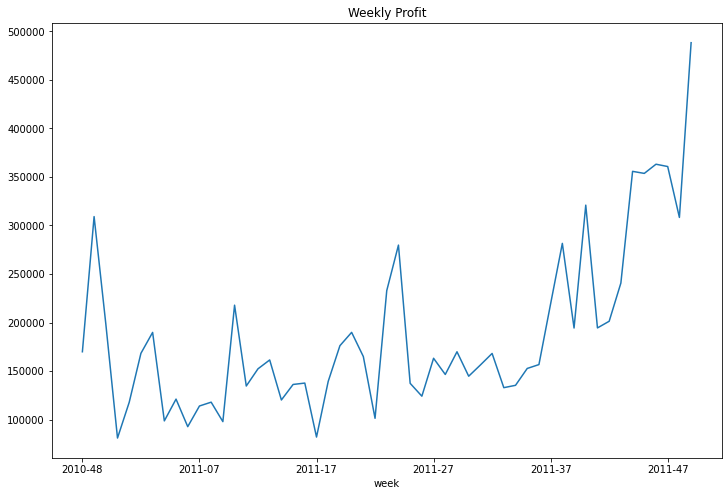

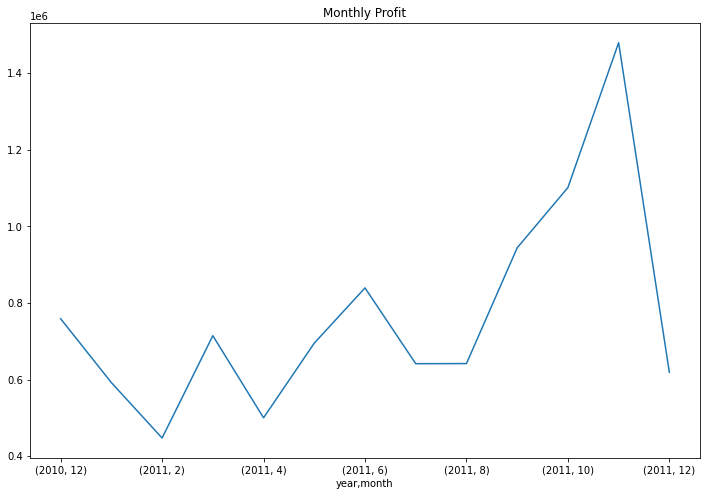

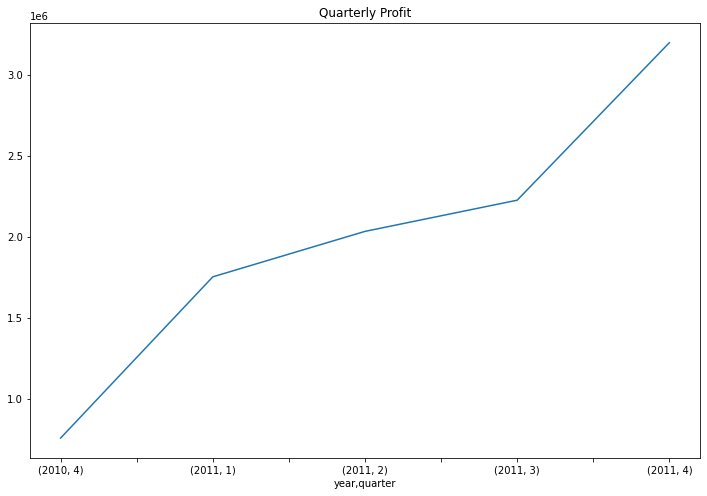

In [ ]:
# Extract data rows with Country value equal to UK
df_uk = df[(df.Country == 'United Kingdom')]

# Extract week, month, year and quarter from the InvoiceDate column
df_uk['week'] = df_uk.InvoiceDate.dt.strftime('%Y-%W')
df_uk['month'] = df_uk.InvoiceDate.dt.month
df_uk['year'] = df_uk.InvoiceDate.dt.year
df_uk['quarter'] = df_uk.InvoiceDate.dt.quarter

# Group and aggregate data
df_uk_sales_w = df_uk.groupby(['week'])['profit'].sum()
df_uk_sales_my = df_uk.groupby(['year', 'month'])['profit'].sum()
df_uk_sales_qy = df_uk.groupby(['year', 'quarter'])['profit'].sum()

# Visualize Weekly Profit 
plt.rcParams["figure.figsize"] = (12,8)
df_uk_sales_w.plot(kind = 'line')
plt.title('Weekly Profit')
plt.show()

# Visualize Monthly Profit 
plt.rcParams["figure.figsize"] = (12,8)
df_uk_sales_my.plot(kind = 'line')
plt.title('Monthly Profit')
plt.show()

# Visualize Quarterly Profit 
plt.rcParams["figure.figsize"] = (12,8)
df_uk_sales_qy.plot(kind = 'line')
plt.title('Quarterly Profit')
plt.show()


From the line plot above, we can clearly see that at the start timestamp which is Desember 2010, the graph seems to decline when entering the early months and week of 2011. And it continues with up and down line movement with quite noticable increase around March and June for the first half of 2011. For the remainder of the year, the graph shows stable movement with a quite stable increase from around August to November. And from the monthly profit graph, it seems that at Desember, the total profit hits the lowest profit value point for the second half of 2011. This might be caused by the lack of Desember's sales data which ends in 9th Desember 2011 so the full month's profit potential still couldn't be reached.   

### Seasonality

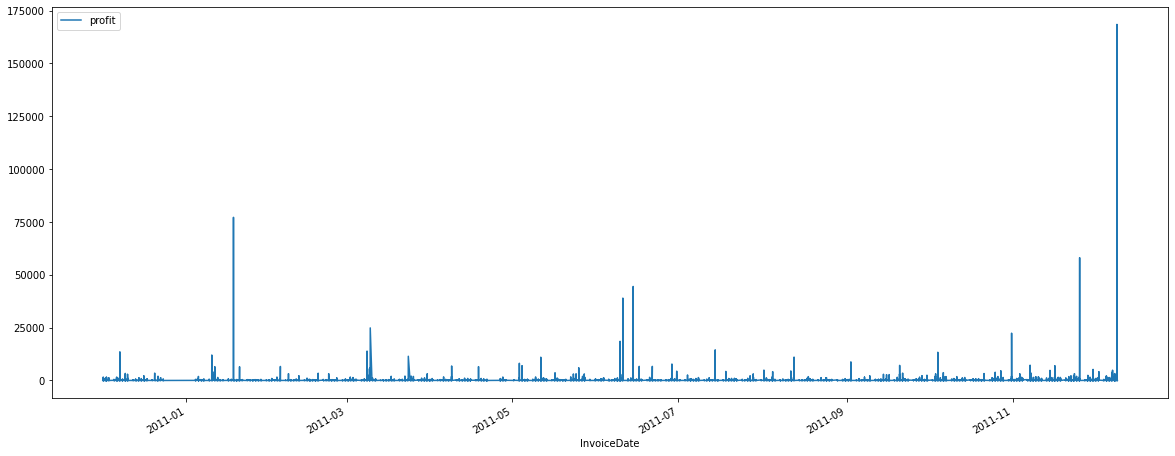

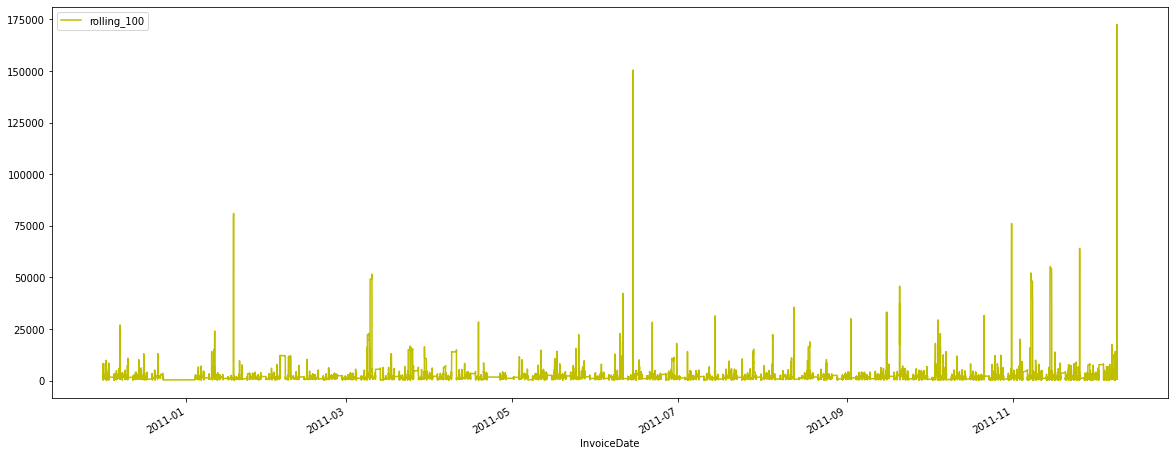

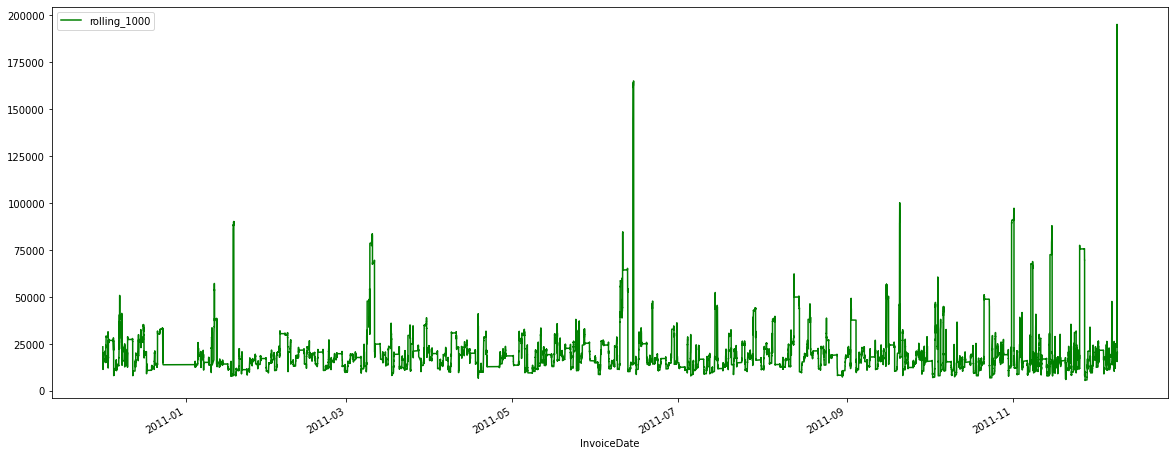

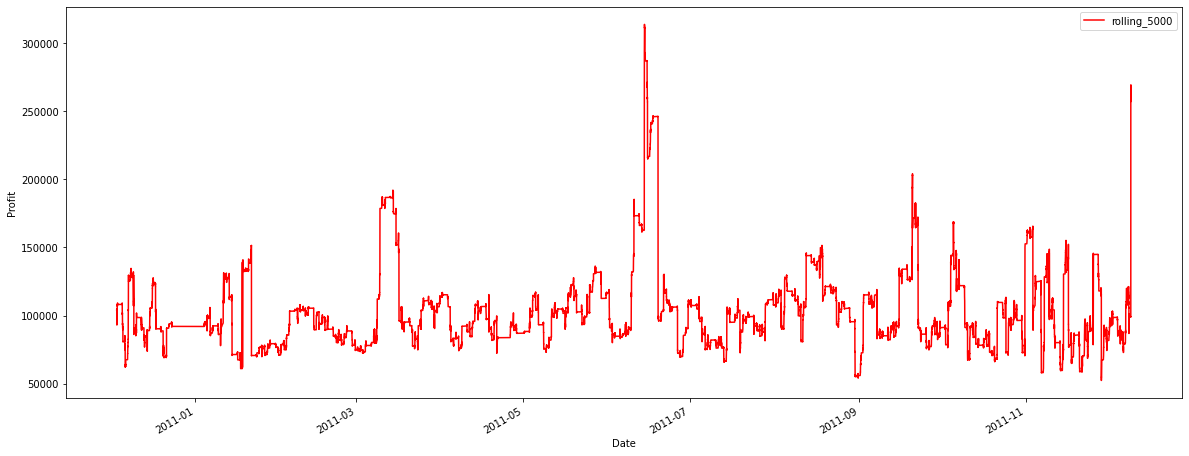

In [ ]:
def plot_profit(country, startDate, endDate):
    df_timed = df[df.Country == country]

    mask = (df_timed['InvoiceDate'] > startDate) & (df_timed['InvoiceDate'] <= endDate)

    df_timed = df_timed.loc[mask]

    df_timed['rolling_100'] = df_timed.profit.rolling(window=100,center=False).sum()
    df_timed['rolling_1000'] = df_timed.profit.rolling(window=1000,center=False).sum()
    df_timed['rolling_5000'] = df_timed.profit.rolling(window=5000,center=False).sum()

    plt.rcParams["figure.figsize"] = (20,8)
    df_timed.plot(x = 'InvoiceDate', y = 'profit')
    df_timed.plot(x = 'InvoiceDate', y = 'rolling_100', color = 'y')
    df_timed.plot(x = 'InvoiceDate', y = 'rolling_1000', color = 'g')
    df_timed.plot(x = 'InvoiceDate', y = 'rolling_5000', color = 'r')
    plt.xlabel('Date')
    plt.ylabel('Profit')
    plt.show()
    
plot_profit('United Kingdom', '12/1/10', '12/11/11')
# plot_profit('Netherlands', '12/1/10', '12/8/11')
# plot_profit('Germany', '12/1/10', '12/8/11')
# plot_profit('Ireland', '12/1/10', '12/8/11')
# plot_profit('France', '12/1/10', '12/8/11')


From United Kingdom's profit trend, from the seasonality plot line, we use the rolling window function with the purpose to smoothened the graph shown as can be seen from the graphs above. 

What I can conclude from the graph above is that, the number of sales are noticeably high around March, June-July, September to November. These high trends could possibly be influenced by holidays and events in the UK. With the current data alone, it might be hard for us to uncover more detail about the trends. 

### 🔎 **Analyze**: Are order sizes from countries outside the United Kingdom significantly larger than orders from inside the United Kingdom?

In [ ]:
df_quantity_country = df.groupby('Country')['Quantity'].sum()
print(df_quantity_country.sort_values(ascending = False))

print('\nTotal Global Orders: ', df.Quantity.sum())
# print('\nTotal UK Orders: ', df_quantity_country.sort_values(ascending = False).head(1))
print('\nTotal UK Orders: ', 4862073)
print('\nTotal Non-UK Orders: ', df.Quantity.sum() - 4862073)
print('\nUK Orders Percentage: ' + str(round(4862073/df.Quantity.sum()*100, 2)) + '%')
print('\nNon-UK Orders Percentage: ' + str(round(100 - round(4862073/df.Quantity.sum()*100, 2),2)) + '%')

Country
United Kingdom          4862073
Netherlands              200937
Ireland                  147447
Germany                  119263
France                   112104
Australia                 84209
Sweden                    36083
Switzerland               30630
Spain                     27951
Japan                     26016
Belgium                   23237
Norway                    19338
Portugal                  16258
Finland                   10704
Channel Islands            9491
Denmark                    8235
Italy                      8112
Cyprus                     6361
Singapore                  5241
Austria                    4881
Hong Kong                  4773
Israel                     4409
Poland                     3684
Unspecified                3300
Canada                     2763
Iceland                    2458
USA                        2458
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671


In terms of order/quantity, we can see that UK has the highest amount of order(Quantity) compared to the others with a whooping 5125106 orders/quantities. UK also made up around 84.48% of the total orders globally, which means we can conclude that UK has more total order/quantity individually compared to the other countries and also total order/quantity percentages compared to Non-UK orders/quantities.

# Conclusion & Recommendation

From the analysis done above, we can retrieve some useful information from the dataset to answer some of the challenge questions. Extensive data preprocessing/analysis such as item groupings, handling outliers, etc. might be conducted and updated to extend the project's scope.

From explored data, we can give some recommendation for business purposes such as run a special promotion for certain events or season such as 'Back to School', 'Summer Holiday', 'Winter Specials' etc. or even renew the app design/theme with the hope it could help drive the sales during low sales months.